In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ballistic_deposition import BallisticDeposition
import KPZ_visualizations as vs
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter
from scipy.optimize import curve_fit



In [ ]:
##HELPER FUNCTIONS
##Calculate W(N,t)
def W_t(h_t):
    #RMS roughness of h_t
    h_t_mean = h_t.mean()           # mean height of the lattice
    W = np.sqrt(np.mean((h_t - h_t_mean)**2))  # RMS width
    return W

def W_snapshots(snapshots):
    # calculates the list of W values at each point in time
    n = len(snapshots)
    W = np.zeros(n)
    for i in range(n):
        h_t = snapshots[i]
        W[i] = W_t(h_t)
    return W

def plot_W(W_snapshots, title="RMS Roughness vs Time"):
    #plots W vs time
    nt = len(W_snapshots)
    t = np.arange(nt)  # time steps

    plt.figure(figsize=(8,5))
    plt.plot(t, W_snapshots, lw=2, color='tab:blue')
    plt.xlabel("Time step")
    plt.ylabel("RMS Roughness W(t)")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def run_ensemble(num_runs, N, nt, dim = 2, events_per_site = 1, seed = 1):
    ### Runs num_runs versions of the simulation with the same parameters
    W_list = np.zeros((num_runs, nt))
    for run in range(num_runs):
        depo = BallisticDeposition(
            N=N,
            nt=nt,
            dim =dim,
            events_per_site=events_per_site,
            seed=(1 + run),
        )
        depo.run()
        h_snapshots = depo.h_time
        W_list[run] = W_snapshots(h_snapshots)
    return W_list


def plot_powerlaw_fit(x, y, x_portion=1.0, title="Power-law Fit", xlabel="x", ylabel="y"):
    #Fits a power law y ~ x^alpha via log-log linear regression.

    x = np.asarray(x)
    y = np.asarray(y)

    # Restrict to portion of x
    x_max = np.max(x)
    mask_portion = x <= x_portion * x_max
    x_fit = x[mask_portion]
    y_fit = y[mask_portion]

    # Keep only positive values
    mask_positive = (x_fit > 0) & (y_fit > 0)
    x_fit = x_fit[mask_positive]
    y_fit = y_fit[mask_positive]

    if len(x_fit) < 2:
        raise ValueError("Not enough positive points for log-log fit.")

    # Linear regression in log-log space
    log_x = np.log(x_fit)
    log_y = np.log(y_fit)

    alpha, logA = np.polyfit(log_x, log_y, 1)
    A = np.exp(logA)

    # Plot
    x_plot = np.linspace(np.min(x_fit), np.max(x_fit), 200)
    y_plot = A * x_plot**alpha

    plt.figure(figsize=(7,5))
    plt.loglog(x, y, 'o', label='Data')
    plt.loglog(x_plot, y_plot, '-', color='red', label=f'Fit: y ~ x^{alpha:.3f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.text(0.05, 0.95, f"Exponent = {alpha:.3f}", transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    plt.legend()
    plt.show()

    return alpha, A

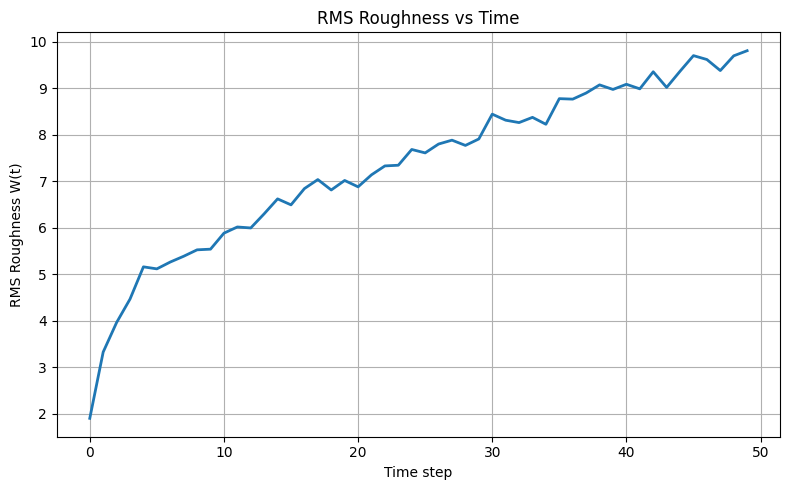

In [ ]:
### Run a ballistic deposition simulation for 1 dimension
N_1D = 500
nt_1D_0 = 50
e_1D = 1
depo_1D = BallisticDeposition(
    N=N_1D,
    nt=nt_1D_0,
    dim = 1,
    events_per_site=e_1D,
    seed=1,
)
depo_1D.run()
snapshots_1D = depo_1D.h_time
W = W_snapshots(snapshots_1D)
plot_W(W)



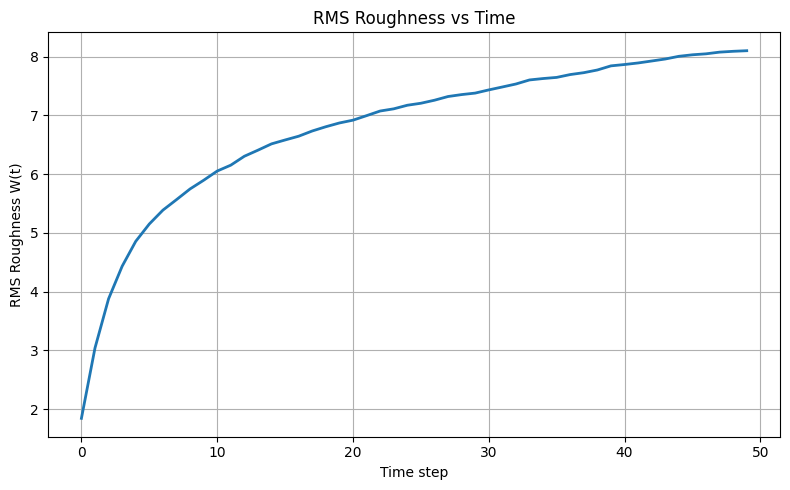

In [53]:
### Run an ensemble and plot the ensemble average in 1D
num_runs = 1000
nt_1D = 50
W_ensemble = run_ensemble(num_runs, N=100, nt=nt_1D, dim = 1, events_per_site = 1, seed = 1)
W_avg_1D = np.mean(W_ensemble, axis=0)
plot_W(W_avg_1D)

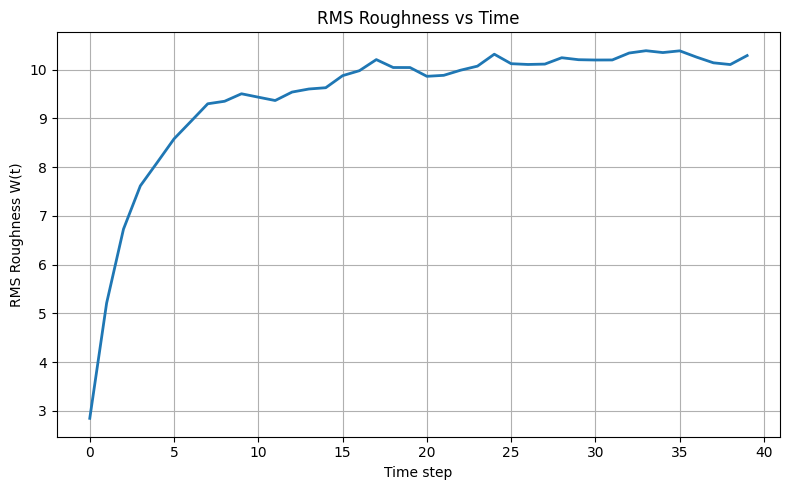

In [ ]:
### Run a ballistic deposition simulation for 2 dimensions
N_2D = 100
nt_2D_0 = 40
e_2D = 1
depo_2D = BallisticDeposition(
    N=N_2D,
    nt=nt_2D_0,
    dim = 2,
    events_per_site=e_2D,
    seed=1,
)
depo_2D.run()
snapshots_2D = depo_2D.h_time
W_2D = W_snapshots(snapshots_2D)
plot_W(W_2D)


In [ ]:
### Run an ensemble and plot the ensemble average in 2D
num_runs = 20
nt_2D = 100
W_ensemble = run_ensemble(num_runs, N=50, nt=nt_2D, dim = 2, events_per_site = 1, seed = 1)
W_avg_2D = np.mean(W_ensemble, axis=0)
plot_W(W_avg_2D)

KeyboardInterrupt: 

(100, 100)
(100, 100)


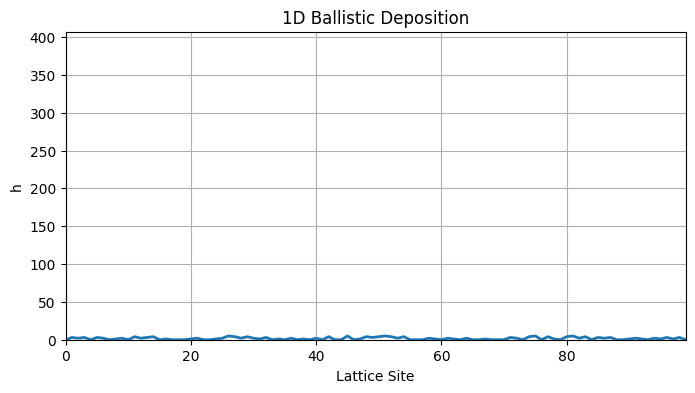

Saved as 1D_ballistic_deposition.gif


In [ ]:
##1D animation
t_vals_list = [np.arange(N_1D) for _ in range(nt_1D_0)]
print(np.shape(snapshots_1D))
print(np.shape(t_vals_list))
anim1d = vs.animate_1d(t_vals_list, snapshots_1D, title="1D Ballistic Deposition", xlabel="Lattice Site")

HTML(anim1d.to_jshtml())
# --- Save the animation as GIF ---
anim1d.save("1D_ballistic_deposition.gif", writer="pillow", fps=20)

print("Saved as 1D_ballistic_deposition.gif")

(100,)
(100,)
(40, 100, 100)
Saved as 2D_ballistic_deposition.gif


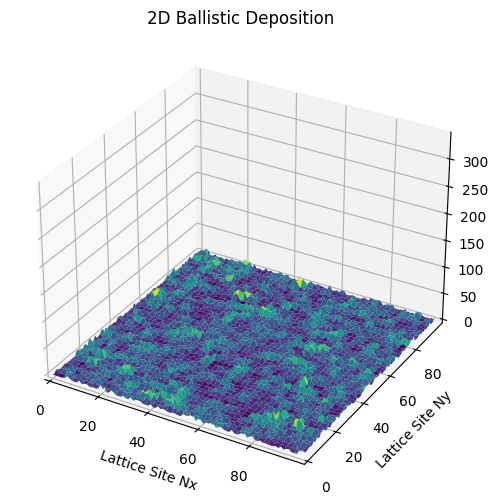

In [12]:
##2D animation
t_vals_list_1 = np.arange(N_2D)
t_vals_list_2 = np.arange(N_2D)
snapshots_2D = np.array(snapshots_2D)

print(np.shape(t_vals_list_1))
print(np.shape(t_vals_list_2))
print(np.shape(snapshots_2D))

anim2d = vs.animate_3d_surface(snapshots_2D, t_vals_list_1, t_vals_list_2,title="2D Ballistic Deposition", xlabel="Lattice Site Nx", ylabel="Lattice Site Ny")

HTML(anim2d.to_jshtml())

# --- Save the animation as GIF ---
anim2d.save("2D_ballistic_deposition.gif", writer="pillow", fps=20)

print("Saved as 2D_ballistic_deposition.gif")

In [80]:
##system size sweep 1D

##WARNING: LONG execute time
sizes = [2**i for i in range(4, 11)]
## sweep powers of 2 to span multiple orders of magnitude
nt = 3000
W_sat = []
tx = []
for N in sizes:
    num_runs = 20
    ens_runs = run_ensemble(num_runs, N, nt, dim=1, events_per_site=1, seed=1)
    
    W_sat_runs = []
    tx_runs = []
    for run in range(num_runs):
        ##compute saturation roughness
        W_run = ens_runs[run]
        final_quarter = W_run[len(W_run) * 3 // 4 : ]
        W_sat_run = np.mean(final_quarter)
        W_sat_runs.append(W_sat_run)
        ##compute saturation time (defined arbitrarily as time at 80% saturation roughness)
        tx_run = np.argmax(W_run >= 0.8*W_sat_run)
        tx_runs.append(tx_run)
        
        
    W_sat_N = np.mean(W_sat_runs)
    W_sat.append(W_sat_N)
    ##compute saturation time (defined arbitrarily as time at 80% saturation roughness)
    tx_N = np.mean(tx_runs)
    tx.append(tx_N)




[16, 32, 64, 128, 256, 512, 1024]
[3.65, 5.05, 10.55, 24.6, 89.05, 209.6, 618.85]


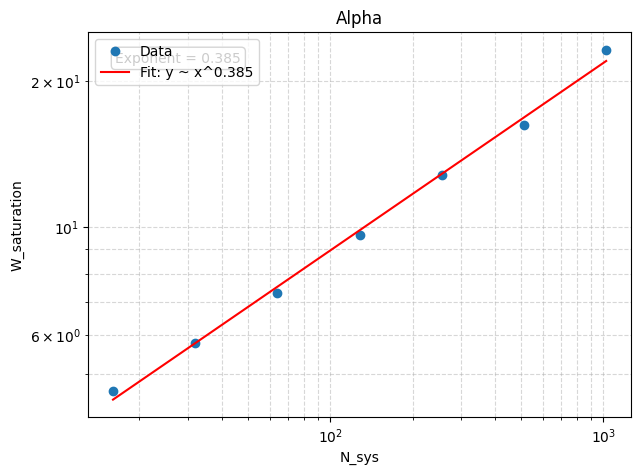

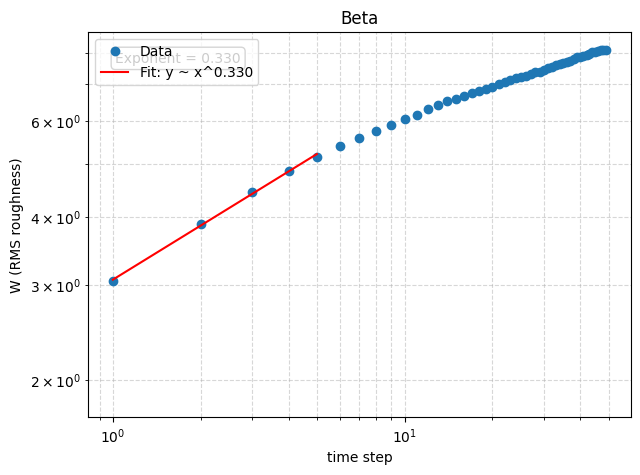

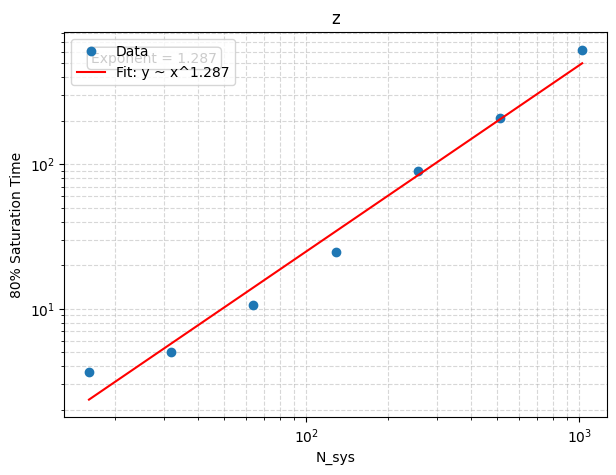

(1.287301575697757, 0.06637604077112215)

In [81]:
##Generate 1D log-log plots and extract critical exponents

print(sizes)
print(tx)
### for alpha
plot_powerlaw_fit(sizes, W_sat, title='Alpha', xlabel="N_sys", ylabel="W_saturation")

### for beta (note: make sure to run the 1D ensemble cell immediately before this)
plot_powerlaw_fit(np.arange(nt_1D), W_avg_1D, x_portion=0.12, title='Beta', xlabel="time step", ylabel="W (RMS roughness)")

### for z
plot_powerlaw_fit(sizes, tx, title='z', x_portion=1, xlabel="N_sys", ylabel="80% Saturation Time")


In [ ]:
##system size sweep 2D

##WARNING: LONG execute time
sizes = [2**i for i in range(4, 11)]
nt = 1000
W_sat_2D = []
tx_2D = []
for N in sizes:
    num_runs = 20
    ens_runs = run_ensemble(num_runs, N, nt, dim=2, events_per_site=1, seed=1)
    
    W_sat_runs = []
    tx_runs = []
    for run in range(num_runs):
        ##compute saturation roughness
        W_run = ens_runs[run]
        final_quarter = W_run[len(W_run) * 3 // 4 : ]
        W_sat_run = np.mean(final_quarter)
        W_sat_runs.append(W_sat_run)
        ##compute saturation time (defined arbitrarily as time at 80% saturation roughness)
        tx_run = np.argmax(W_run >= 0.8*W_sat_run)
        tx_runs.append(tx_run)
        
        
    W_sat_N = np.mean(W_sat_runs)
    W_sat_2D.append(W_sat_N)
    ##compute saturation time (defined arbitrarily as time at 80% saturation roughness)
    tx_N = np.mean(tx_runs)
    tx_2D.append(tx_N)







In [63]:
##Generate 2D log-log plots and extract critical exponents


### for alpha
plot_powerlaw_fit(sizes, W_sat_2D, title='Alpha', xlabel="N_sys", ylabel="W_saturation")

### for beta (note: make sure to run the 1D ensemble cell immediately before this)
plot_powerlaw_fit(np.arange(nt_2D), W_avg_2D, x_portion=0.12, title='Beta', xlabel="time step", ylabel="W (RMS roughness)")

### for z
plot_powerlaw_fit(sizes, tx_2D, title='z', xlabel="N_sys", ylabel="80% Saturation Time")


NameError: name 'W_sat_2D' is not defined